# Manual: Calculate a Diffusion coefficient for a nanoporous carbon material (NCM)
This manual is written for the paper "Molecular determinants of solvent nanoseparation by nanoporous carbon materials".  

Content:
Description on how to calculate a Diffusion coefficient when starting with simulation data.

Given (what you need):
- topology file of a simulation of a NCM (topol.tpr)
- trajectory file of the same simulation (traj.xtc)

Goal (what you get):
- passage time distribution
- Diffusion coefficient estimation using first passage time theory

## 1. Import required packages
You need:
- AnalysisForNanoporousCarbonMaterials package installed

In [1]:
import json

from AnalysisForNanoporousCarbonMaterials.DiffusionAnalysis import DiffusionAnalysis
from AnalysisForNanoporousCarbonMaterials.MembraneStructures import HexagonalMembrane

## 2. Define location of the input files
Here you have to define where the following files are:
- topol.tpr
- traj.xct

In [2]:
path = "path/to/simulation/results/"
topology_file = path + "topol.tpr"
trajectory_file = path + "traj.xtc"

## 3. Define the structure of the membrane
The options are:
- Hexagonal membrane
- Cubic membrane
- Solvent system

In this example the simulation is for a hexagonal membrane with a lenght (L) of 180 Angstrom

In [3]:
structure = HexagonalMembrane(
            selectors="resname C",
            L=180,
        )

## 4. Create the DiffusionAnalysis object
- The filepaths and the result paths are constructed
- analysis_max_step_size_ps=200 means that if the step size of the traj.xtc file is smaller than that, only every nth frame is stored and analysed to match the 200ps step for efficiency. The actual analysed step size can be seen in the print of the DiffusionAnalysis object. Here 200ps are chosen since we expect for this simulation the transitions through the pore to be slower than 200ps.
- verbose is set to false in this notebook, verbose only works well in terminals.

In [4]:
DA = DiffusionAnalysis(
    topology_file=topology_file,
    trajectory_file=trajectory_file,
    results_dir=path + "analysis/",
    analysis_max_step_size_ps=200, 
    verbose=False,
    membrane = structure
)

print(DA)

/bigpool/users/st166545/AnalysisForNanoporousCarbonMaterials/.venv/lib/python3.12/site-packages/MDAnalysis/coordinates/XDR.py:202: UserWarning: Cannot write lock/offset file in same location as /bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/traj.xtc. Using slow offset calculation.
  warnings.warn(f"Cannot write lock/offset file in same location as "
/bigpool/users/st166545/AnalysisForNanoporousCarbonMaterials/.venv/lib/python3.12/site-packages/MDAnalysis/coordinates/XDR.py:258: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/.traj.xtc_offsets.npz'
  warnings.warn(f"Couldn't save offsets because: {e}")


DiffusionAnalysis object:
  topology_file: /bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/topol.tpr
  trajectory_file: /bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/traj.xtc
  results_dir: /bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/analysis/
  Membrane: HexagonalMembrane: selectors=['resname C'], 
L=180, 
lowerZ=None, 
isAtomAbove=None, 
isAtomBelow=None
  verbose: False
  trajectories: dict_keys([])
  results: 
      D: {}
      passageTimes: {}
      passageStarts: {}
      passageIndices: {}
      n_passages: {}
  Simulation footprints: 
      u_trajectory_dt (ps): 100.0
      u_sim_time (ps): 2000000.0
      analysis_max_step_size_ps (ps): 200
      actual analysed step_size (ps): 200.0
      nth_frame: 2
      n_frames analysed: 10001
      ana_sim_time (ps): 2000000.0
      u: <Universe with 36930 atoms>
      unique atom-names: {'C', 'C2', 'C3', 'C1'}
      u

## 6. Run the analysis  

### a. Locate the membrane
First the membrane has to be located in the simulation box to make the succeding analyses possible.
This is done by calling the class-methods in the following order

Lower boundary of the hexagonal structure: 233.23501586914062 Angstrom


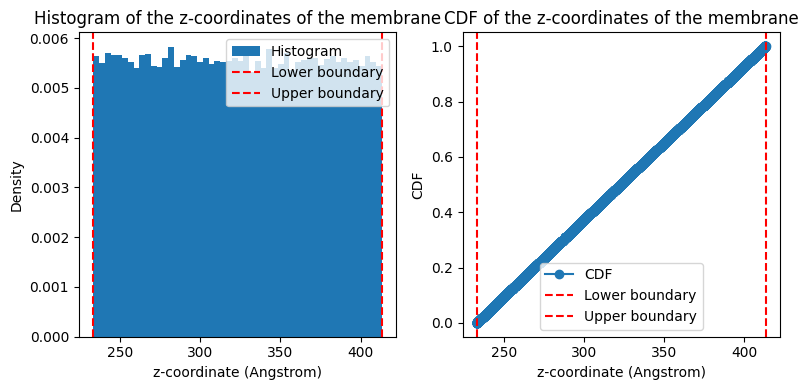

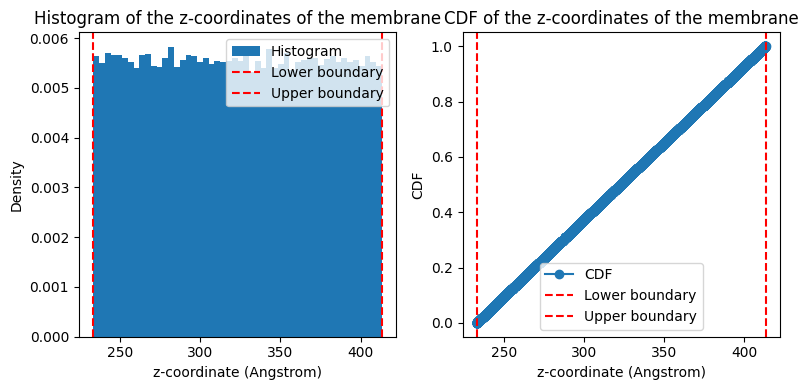

In [5]:

DA.find_membrane_location()
DA.print_membrane_location()
DA.verify_membrane_location()

### b. Calculate passage times and distribution

For this a selector has to be defined for which the analysis should be perfromed. The selection is done in the same language as the MDAnalysis package.

In [6]:
selector = "resname HEX and name C1"
short = "hex_c1"

DA.calc_passagetimes(selector)
print(f"{short}-passages: " + str(len(DA.passageTimes[selector])))

hex_c1-passages: 2583


### c. Calculate diffusion coefficient
Here the diffusion coefficient is calculated by fitting the passage time distribution PDF to the first passage time distribution (PDF) and also plotting the resulting fit.

Calculating diffusion coefficient using a PDF fit ...
hex_c1-Diffusioncoefficient: 89,96664993815703


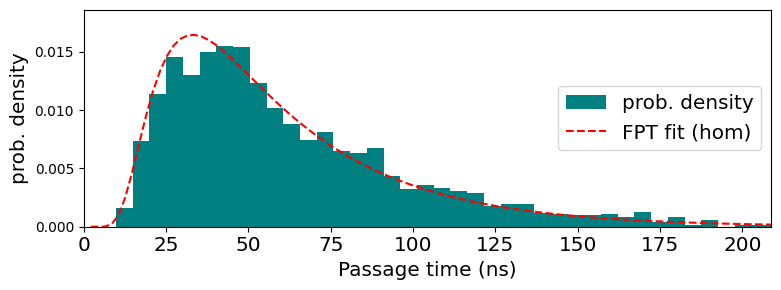

In [7]:
DA.calc_diffusion(selector, D_guess = DA.guess_D(selector))
print(f"{short}-Diffusioncoefficient: " + str(DA.D[selector]).replace(".", ","))

fig = DA.plot_diffusion(selector)

### d. (optional) Plot further validation diagrams
these are for example the start time plot. these can be used toc heck if everything goes right and for plausibility check.

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

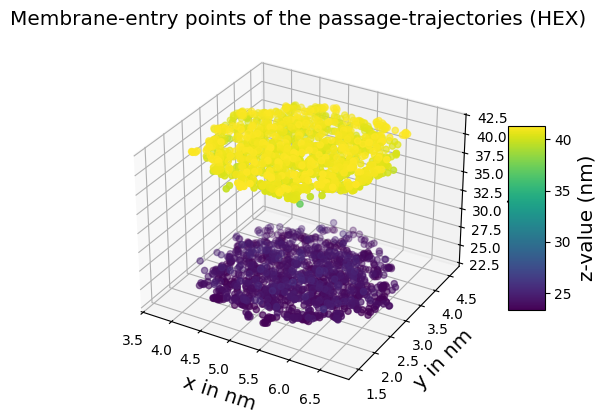

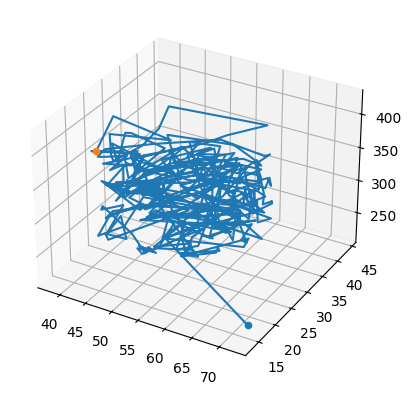

In [8]:
DA.plot_starting_points("resname HEX and name C1")

DA.create_rand_passages_plot("resname HEX and name C1", 1)

In [9]:
print("\n\n\n RESULTS:")
print(json.dumps(DA.D, indent=4))




 RESULTS:
{
    "resname HEX and name C1": 89.96664993815703
}
